Els cinc grans trets de personalitat, també coneguts com el model de cinc factors (FFM) i el model OCEAN, és una taxonomia, o agrupació, per als trets de personalitat. Quan s'aplica l'anàlisi de factors (una tècnica estadística) a les dades de l'enquesta de personalitat, algunes paraules utilitzades per descriure aspectes de la personalitat s'apliquen sovint a la mateixa persona. Per exemple, és més probable que algú descrit com a conscient sigui descrit com "sempre preparat" en lloc de "maldestre". Aquesta teoria es basa, per tant, en l'associació entre paraules però no en experiments neuropsicològics. Aquesta teoria utilitza descriptors del llenguatge comú i, per tant, suggereix cinc grans dimensions comunament utilitzades per descriure la personalitat humana i la psique.

La idea és que amb aquest conjunt de dades, que conté respostes de 1-5 (1=Desgrau, 3=Neutral, 5=Acord) a diverses preguntes, es classifiqui cada persona segons els 5 trets del model Big Five, utilitzant un enfocament de classificació que agrupa les persones en categories en funció de les seves puntuacions. Per a això, definirem un llindar per a quantificar la presència de cada tret de personalitat en diferents individus: Baix, Mitjà, Alt. Com quantificarem aquest llindar? Utilitzant percentils. Per exemple, una puntuació d'Extroversió , 75 indicaria Alta Extroversió.

1. LIBRARIES IMPORTATION AND DATA READING

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as bplt
import matplotlib.pylab as plt
import seaborn as sns
from sklearn.impute import SimpleImputer, KNNImputer
import time
from sklearn.preprocessing import LabelEncoder, StandardScaler
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, classification_report, r2_score, confusion_matrix, average_precision_score, precision_recall_curve, auc, roc_curve,roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score, StratifiedKFold, GridSearchCV
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
dataset = pd.read_csv(f'C:/Users/adria/OneDrive/Escritorio/MatCAD/3º/1ºCuatri/Aprenentatge Computacional/Cas Kaggle/data-final.csv', delimiter='\t', encoding='utf-8')

In [3]:
print("\nMirem descripció general:")
dataset.describe()


Mirem descripció general:


,EXT1 EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,...,OPN7_E,OPN8_E,OPN9_E,OPN10_E,screenw,screenh,introelapse,testelapse,endelapse,IPC
count,1.013558e+06,1.013558e+06,1.013558e+06,1.013558e+06,1.013558e+06,1.013558e+06,1.013558e+06,1.013558e+06,1.013558e+06,1.013558e+06,...,1.013558e+06,1.013558e+06,1.013558e+06,1.013558e+06,1.013275e+06,1.013275e+06,1.013275e+06,1.013558e+06,1.015341e+06,1.015341e+06
mean,2.773115e+00,3.288349e+00,3.140595e+00,3.276960e+00,2.401100e+00,2.771744e+00,3.414818e+00,2.963740e+00,3.556469e+00,3.285969e+00,...,7.689488e+03,5.423945e+03,6.325802e+03,5.336311e+03,1.149510e+03,8.262611e+02,9.590748e+02,6.754233e+02,2.701410e+03,1.045211e+01
std,1.323943e+00,1.215006e+00,1.237442e+00,1.277593e+00,1.225721e+00,1.400336e+00,1.271915e+00,1.346040e+00,1.305232e+00,1.345600e+00,...,5.841987e+05,2.629748e+05,4.298906e+05,4.408225e+05,5.600884e+02,1.802490e+02,5.104005e+04,2.017864e+04,1.483898e+06,3.982879e+01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,-6.181300e+04,-5.001200e+04,-9.598600e+04,-3.594871e+06,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
25%,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,1.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,3.000000e+00,2.000000e+00,...,2.279000e+03,2.144000e+03,2.329000e+03,1.484000e+03,4.140000e+02,7.200000e+02,5.000000e+00,1.710000e+02,9.000000e+00,1.000000e+00
50%,3.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,2.000000e+00,3.000000e+00,4.000000e+00,3.000000e+00,4.000000e+00,3.000000e+00,...,3.208000e+03,3.051000e+03,3.269000e+03,2.192000e+03,1.366000e+03,7.680000e+02,1.000000e+01,2.240000e+02,1.300000e+01,1.000000e+00
75%,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,3.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,5.000000e+00,4.000000e+00,...,4.729000e+03,4.469000e+03,4.785000e+03,3.362000e+03,1.440000e+03,9.000000e+02,3.000000e+01,3.130000e+02,1.800000e+01,2.000000e+00
max,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,...,3.891434e+08,1.696693e+08,3.470326e+08,3.344289e+08,1.366000e+04,8.802000e+03,2.944307e+07,1.189272e+07,1.493327e+09,7.250000e+02


In [4]:
print("Número d'atributs del dataset:", len(dataset.keys()))
print("Número de files en el dataset: ",dataset.shape[0])

print("\nAtributs del dataset i el seu tipus:")
print (dataset.dtypes) 

Número d'atributs del dataset: 109
Número de files en el dataset:  1015341

Atributs del dataset i el seu tipus:
EXT1    EXT2             float64
EXT3                     float64
EXT4                     float64
EXT5                     float64
EXT6                     float64
                          ...   
endelapse                  int64
IPC                        int64
country                   object
lat_appx_lots_of_err      object
long_appx_lots_of_err     object
Length: 109, dtype: object


Com realment no queda clar quin és el significat de cada atribut, crearem un algorisme amb el qual l'usuari pugui comprovar que vol dir cadascun d'ells

In [5]:
# Clean text from invisible characters
def cleaning(text):
    # Replace tabs and other invisible characters with spaces
    return text.replace("\t", " ").replace("\n", " ").strip()

# Load the questions and their descriptions into a dictionary
def questions(file):
    qts = {}
    with open(file, 'r', encoding='utf-8') as file:
        for line in file:
            if line.strip():  # Ignore empty lines
                clean_line = cleaning(line)
                # Split by spaces or tabs to get key and description
                sections = clean_line.split(maxsplit=1)
                if len(sections) == 2:
                    key, description = sections
                    qts[key.strip()] = description.strip()  # Normalize spaces
    return qts

# Look up the meaning of a key
def meaning(questions):
    while True:
        keys = input("Enter the key that you want to know (or type 'leave' to finish): ").strip()
        if keys.lower() == 'leave':
            print("Search finished.")
            break
        elif keys in questions:
            print(f"{keys}: {questions[keys]}")
        else:
            print(f"The key '{keys}' is not in the file. Please try again.")

# Path to the Questions.txt file
file = "C:/Users/adria/OneDrive/Escritorio/MatCAD/3º/1ºCuatri/Aprenentatge Computacional/Cas Kaggle/Questions.txt"

try:
    # Load the questions
    questions = questions(file)
    print("The questions have been loaded successfully.")
    # Start the interactive search
    meaning(questions)
except FileNotFoundError:
    print(f"The file '{file}' was not found.")
except Exception as e:
    print(f"Error: {e}")


The questions have been loaded successfully.
Search finished.


In [6]:
# Imprimir las columnas con NaNs
nan_columns = dataset.columns[dataset.isna().sum() > 0].tolist()
print("NÚMERO DE NANS POR COLUMNA:")
print(dataset.loc[:, nan_columns].isna().sum())

# Imprimir el porcentaje de NaNs por columna
print("\nPORCENTAJES DE NANS POR COLUMNA:")
print(dataset.loc[:, nan_columns].isna().sum() / len(dataset) * 100)

# Seleccionar columnas sin NaNs
non_nan_columns = dataset.columns[dataset.isna().sum() == 0].tolist()

# Imprimir columnas sin NaNs
print("\nCOLUMNAS SIN NANS:")
print(non_nan_columns)


NÚMERO DE NANS POR COLUMNA:
EXT1    EXT2    1783
EXT3            1783
EXT4            1783
EXT5            1783
EXT6            1783
                ... 
screenw         2066
screenh         2066
introelapse     2066
testelapse      1783
country           77
Length: 104, dtype: int64

PORCENTAJES DE NANS POR COLUMNA:
EXT1    EXT2    0.175606
EXT3            0.175606
EXT4            0.175606
EXT5            0.175606
EXT6            0.175606
                  ...   
screenw         0.203478
screenh         0.203478
introelapse     0.203478
testelapse      0.175606
country         0.007584
Length: 104, dtype: float64

COLUMNAS SIN NANS:
['dateload', 'endelapse', 'IPC', 'lat_appx_lots_of_err', 'long_appx_lots_of_err']


Hi ha molts Nans, per tant més endavant haurem de fer canvis.

In [7]:
numeric_features = dataset.select_dtypes(np.number).keys()
non_numeric = [k for k in dataset.keys() if k not in numeric_features]
print("Numeric features: ", numeric_features)
print("Non numeric features: ", non_numeric)
print(dataset[non_numeric].dtypes)

Numeric features:  Index(['EXT1    EXT2', 'EXT3', 'EXT4', 'EXT5', 'EXT6', 'EXT7', 'EXT8', 'EXT9',
       'EXT10', 'EST1',
       ...
       'OPN7_E', 'OPN8_E', 'OPN9_E', 'OPN10_E', 'screenw', 'screenh',
       'introelapse', 'testelapse', 'endelapse', 'IPC'],
      dtype='object', length=105)
Non numeric features:  ['dateload', 'country', 'lat_appx_lots_of_err', 'long_appx_lots_of_err']
dateload                 object
country                  object
lat_appx_lots_of_err     object
long_appx_lots_of_err    object
dtype: object


In [8]:
dataset['dateload'] = pd.to_datetime(dataset['dateload']) 

# Convertir la fecha a un valor numérico (timestamp)
dataset['date_numeric'] = dataset['dateload'].astype(int) / 10**9  # En segundos
#dataset['country'].head()

#pel cas de country, utilitzem label encoding

label_encoder = LabelEncoder()
dataset['country'] = label_encoder.fit_transform(dataset['country'])
dataset.head()

,EXT1 EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,...,screenw,screenh,introelapse,testelapse,endelapse,IPC,country,lat_appx_lots_of_err,long_appx_lots_of_err,date_numeric
4.0,1.0,5.0,2.0,5.0,1.0,5.0,2.0,4.0,1.0,1.0,...,768.0,1024.0,9.0,234.0,6,1,69,51.5448,0.1991,1.456970e+09
3.0,5.0,3.0,4.0,3.0,3.0,2.0,5.0,1.0,5.0,2.0,...,1360.0,768.0,12.0,179.0,11,1,144,3.1698,101.706,1.456970e+09
2.0,3.0,4.0,4.0,3.0,2.0,1.0,3.0,2.0,5.0,4.0,...,1366.0,768.0,3.0,186.0,7,1,69,54.9119,-1.3833,1.456971e+09
2.0,2.0,2.0,3.0,4.0,2.0,2.0,4.0,1.0,4.0,3.0,...,1920.0,1200.0,186.0,219.0,7,1,69,51.75,-1.25,1.456971e+09
3.0,3.0,3.0,3.0,5.0,3.0,3.0,5.0,3.0,4.0,1.0,...,1366.0,768.0,8.0,315.0,17,2,103,1.0,38.0,1.456971e+09


In [9]:
"""
# Calcular matriz de correlación
# correlation_matrix = dataset.corr()
# Mostrar la matriz de correlación
# print(correlation_matrix)

# Tomar una muestra aleatoria de 100,000 filas
sampled_dataset = dataset.sample(n=100000, random_state=1)

# Filtrar solo las columnas numéricas
numeric_columns = sampled_dataset.select_dtypes(include=['float64', 'int64']).columns

# Seleccionar solo las columnas numéricas
sampled_dataset_numeric = sampled_dataset[numeric_columns]

# Calcular la matriz de correlación para las columnas numéricas
correlation_matrix = sampled_dataset_numeric.corr()

# Mostrar el resultado
# print(correlation_matrix)

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

# Establecer un umbral para la correlación
umbral = 0.5

# Crear una máscara booleana para encontrar las correlaciones mayores al umbral
# Esto elimina las correlaciones de la diagonal (correlaciones perfectas consigo mismas)
mask = (correlation_matrix.abs() > umbral) & (correlation_matrix.abs() < 1)

# Obtener las columnas y filas de las correlaciones significativas
highly_correlated = correlation_matrix[mask].stack().reset_index()

# Filtrar las correlaciones con el valor en la matriz
highly_correlated.columns = ['Variable 1', 'Variable 2', 'Correlación']

# Mostrar las variables altamente correlacionadas
#print(highly_correlated)
"""


"\n# Calcular matriz de correlación\n# correlation_matrix = dataset.corr()\n# Mostrar la matriz de correlación\n# print(correlation_matrix)\n\n# Tomar una muestra aleatoria de 100,000 filas\nsampled_dataset = dataset.sample(n=100000, random_state=1)\n\n# Filtrar solo las columnas numéricas\nnumeric_columns = sampled_dataset.select_dtypes(include=['float64', 'int64']).columns\n\n# Seleccionar solo las columnas numéricas\nsampled_dataset_numeric = sampled_dataset[numeric_columns]\n\n# Calcular la matriz de correlación para las columnas numéricas\ncorrelation_matrix = sampled_dataset_numeric.corr()\n\n# Mostrar el resultado\n# print(correlation_matrix)\n\nsns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')\nplt.title('Correlation Matrix')\nplt.show()\n\n# Establecer un umbral para la correlación\numbral = 0.5\n\n# Crear una máscara booleana para encontrar las correlaciones mayores al umbral\n# Esto elimina las correlaciones de la diagonal (correlaciones perfectas consi

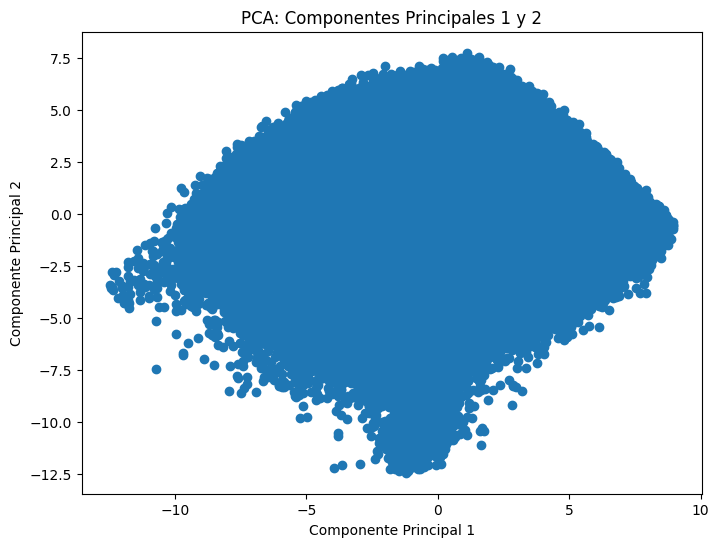

In [10]:
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Seleccionar las columnas numéricas
numeric_columns = dataset.select_dtypes(include=['float64', 'int64']).columns
data_numeric = dataset[numeric_columns]

# Imputar los valores faltantes con la media (puedes usar 'median' en vez de 'mean')
imputer = SimpleImputer(strategy='mean')
data_imputed = imputer.fit_transform(data_numeric)

# Estandarizar los datos
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_imputed)

# Aplicar PCA con 2 componentes
pca = PCA(n_components=2)
principal_components = pca.fit_transform(data_scaled)

# Crear un DataFrame con los componentes principales
pca_df = pd.DataFrame(principal_components, columns=['Component_1', 'Component_2'])

# Visualizar los componentes principales
plt.figure(figsize=(8, 6))
plt.scatter(pca_df['Component_1'], pca_df['Component_2'])
plt.title('PCA: Componentes Principales 1 y 2')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.show()
